<a href="https://colab.research.google.com/github/rupakdude24/tensorflow/blob/master/Clothing_AV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install PyDrive

In [0]:
import tensorflow as tf

In [0]:
import matplotlib.pyplot as plt

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
download = drive.CreateFile({'id': '1tCDT-SOgSNrdHa9Csq-FirsQuvCCL8Uj'})

In [9]:
download.GetContentFile('train_LbELtWX.zip')
!unzip train_LbELtWX.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/45712.png         
 extracting: train/57389.png         
 extracting: train/5260.png          
 extracting: train/58492.png         
 extracting: train/58143.png         
 extracting: train/616.png           
 extracting: train/25467.png         
 extracting: train/37219.png         
 extracting: train/55151.png         
 extracting: train/57860.png         
 extracting: train/22627.png         
 extracting: train/52644.png         
 extracting: train/45879.png         
 extracting: train/33451.png         
 extracting: train/23972.png         
 extracting: train/38967.png         
 extracting: train/38753.png         
 extracting: train/33900.png         
 extracting: train/50011.png         
 extracting: train/1922.png          
 extracting: train/5638.png          
 extracting: train/37358.png         
 extracting: train/6609.png          
 extracting: train/6492.png          
 extracting: train/36174.png         

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

Using TensorFlow backend.


# New Section

In [0]:
train = pd.read_csv('train.csv')

In [12]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('train/'+train['id'][i].astype('str')+'.png', target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

  0%|          | 0/60000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 60000/60000 [00:15<00:00, 3860.18it/s]


In [0]:
label = train.label

In [14]:
print('Train: ', train.shape)

Train:  (60000, 2)


In [34]:
train.label.unique()

array([9, 0, 3, 2, 7, 5, 1, 6, 4, 8])

In [0]:
y=train['label'].values
y = to_categorical(y)

In [40]:
y.shape

(60000, 10)

In [0]:
# Mapping Classes
class_names = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

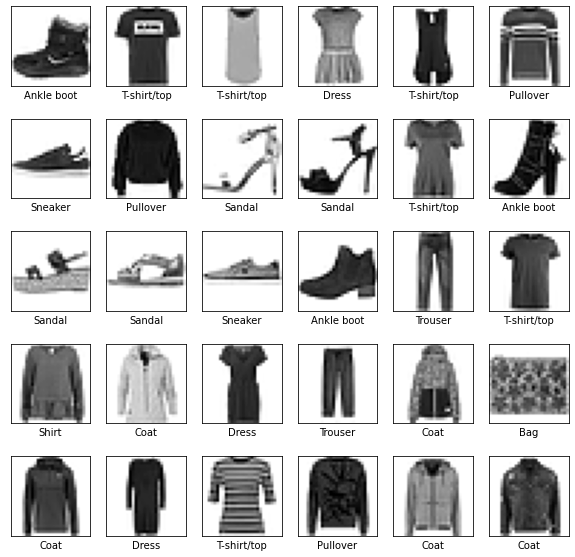

In [20]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_image[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(class_names[label[i]])
plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [0]:
# Building a ConvNet
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))


model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))

model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
    
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))



In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [63]:
# Training the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 24s 510us/step - loss: 0.5315 - accuracy: 0.8125 - val_loss: 0.3072 - val_accuracy: 0.8841
Epoch 2/10
48000/48000 [==============================] - 24s 510us/step - loss: 0.3352 - accuracy: 0.8824 - val_loss: 0.2530 - val_accuracy: 0.9044
Epoch 3/10
48000/48000 [==============================] - 24s 503us/step - loss: 0.2777 - accuracy: 0.9012 - val_loss: 0.2276 - val_accuracy: 0.9164
Epoch 4/10
48000/48000 [==============================] - 24s 506us/step - loss: 0.2476 - accuracy: 0.9123 - val_loss: 0.2248 - val_accuracy: 0.9172
Epoch 5/10
48000/48000 [==============================] - 25s 513us/step - loss: 0.2292 - accuracy: 0.9185 - val_loss: 0.2195 - val_accuracy: 0.9217
Epoch 6/10
48000/48000 [==============================] - 24s 506us/step - loss: 0.2115 - accuracy: 0.9245 - val_loss: 0.2070 - val_accuracy: 0.9240
Epoch 7/10
48000/48000 [==============================] 

In [73]:
score = model.evaluate(X_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

12000/12000 [==============================] - 1s 117us/step
Loss: 0.2003
Accuracy: 0.9302


In [72]:
download = drive.CreateFile({'id': '1u8uqIHnGZ1p8Rw8iQrND67PPUCG1oVIu'})
download.GetContentFile('test_ScVgIM0.zip')
!unzip test_ScVgIM0.zip

Streaming output truncated to the last 5000 lines.
 extracting: test/62169.png          
 extracting: test/66934.png          
 extracting: test/66646.png          
 extracting: test/63831.png          
 extracting: test/60971.png          
 extracting: test/68881.png          
 extracting: test/60259.png          
 extracting: test/68746.png          
 extracting: test/67545.png          
 extracting: test/60231.png          
 extracting: test/61498.png          
 extracting: test/63501.png          
 extracting: test/69452.png          
 extracting: test/61135.png          
 extracting: test/69976.png          
 extracting: test/60242.png          
 extracting: test/62900.png          
 extracting: test/69423.png          
 extracting: test/63283.png          
 extracting: test/62168.png          
 extracting: test/68546.png          
 extracting: test/61642.png          
 extracting: test/66667.png          
 extracting: test/69581.png          
 extracting: test/64172.png          

In [0]:
test = pd.read_csv('test.csv')

In [78]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('test/'+test['id'][i].astype('str')+'.png', target_size=(28,28,1), grayscale=True)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

  0%|          | 0/10000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 10000/10000 [00:02<00:00, 3858.50it/s]


In [0]:
prediction = model.predict_classes(test)

In [84]:
prediction[3]

1

In [0]:
download = drive.CreateFile({'id': '1IBoPORmfXaEmZCEqPm1gxx1bdYZWhqUB'})
download.GetContentFile('sample_submission_I5njJSF.csv')

In [0]:
sample = pd.read_csv('sample_submission_I5njJSF.csv')

sample['label'] = prediction
sample.to_csv('sample.csv', header=True, index=False)